<a href="https://colab.research.google.com/github/ruudvlutters/Handwriting-synthesis/blob/master/FastSAM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

fatal: destination path 'FastSAM' already exists and is not an empty directory.


In [ ]:
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/checkpoints/FastSAM.pt

--2023-06-23 02:43:30--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/checkpoints/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 65.8.178.27, 65.8.178.12, 65.8.178.118, ...
Connecting to huggingface.co (huggingface.co)|65.8.178.27|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1687747410&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzcxL2MzLzcxYzNlYzVhODNmM2ZjMzc0NjY1Y2VjOTI0MGY2MTQyNjJlMjkwODhmY2ExYTE4NzMyNTcxZTEzYzcwODRmMWIvYzBiZTRlN2RkYmU0YzE1MzMzZDE1YTg1OWM2NzZkMDUzYzQ4NmQwYTc0NmEzYmU2YTdhOTc5MGQ1MmE5YjZkNz9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG

In [ ]:
!pip install -r FastSAM/requirements.txt
!pip install git+https://github.com/openai/CLIP.git

In [ ]:
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

--2023-06-23 02:43:51--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg’

dog.jpg             100%[===================>]  97.51K  --.-KB/s    in 0.01s   

2023-06-23 02:43:51 (6.89 MB/s) - ‘images/dog.jpg’ saved [99846/99846]



In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = cv2.imread('images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

800 534


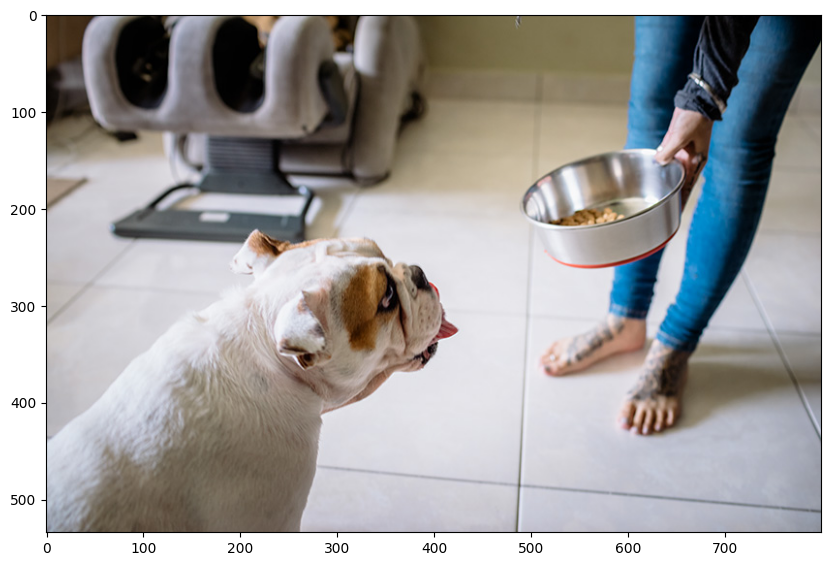

In [ ]:
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.imshow(image)

"--imgsz 1024" means the input image size is 1024. Our model was trained on a size of 1024. You can change it to any size you want to input. Using other sizes would produce different segmentation results.

In [ ]:
!python FastSAM/Inference.py  --model_path FastSAM.pt --img_path ./images/dog.jpg --imgsz 1024


image 1/1 /content/images/dog.jpg: 704x1024 35 objects, 15010.2ms
Speed: 14.1ms preprocess, 15010.2ms inference, 537.4ms postprocess per image at shape (1, 3, 1024, 1024)


800 534


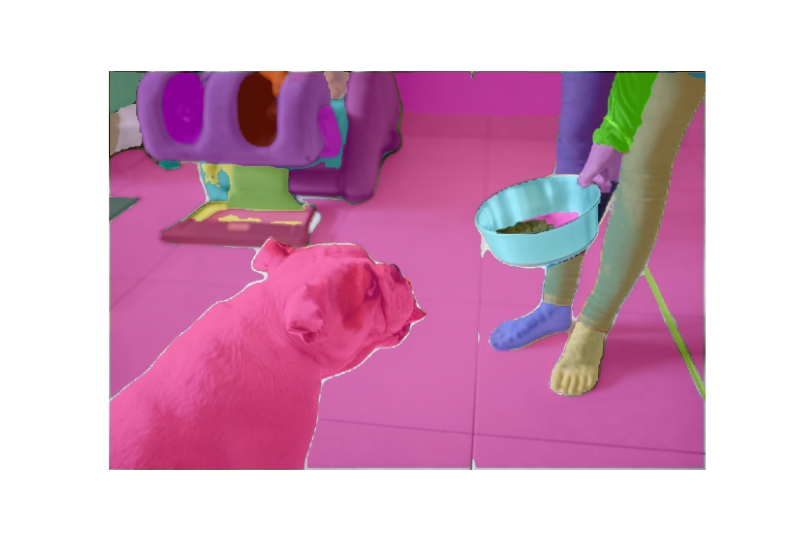

In [ ]:
image = cv2.imread('output/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)